# Projet Data Mining

## Affichage des données
On regarde les données dans un tableur, puis on les affiches sur une carte avec Folium. On les mets dans un Dataframe pour pouvoir les traiter plus facilement.
On remarque que pour certaines données, il manque le titre ou les tags, mais que le reste des informations sont toujours présente. Egalement, certaines photos proviennent du même post, et présentent donc le même titre, la même date d'upload, voir même la même localisation.


In [20]:
# installation of required libraries and dependencies
# numeric calculations
! pip install numpy==1.26.0 
# data frames 
! pip install pandas==2.1.1 
# machine learning algorithms 
! pip install scikit-learn==1.5.1 
! pip install scipy==1.12.0
# plotting 
! pip install plotly==5.24.1 
! pip install matplotlib==3.8.0 
! pip install seaborn==0.13.2 
! pip install plotly-express==0.4.1 
! pip install chart-studio==1.1.0 
# web app library 
! pip install streamlit==1.37.1 
# association rules
! pip install mlxtend==0.23.3

! pip install nbformat==5.9.2 

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [55]:
import folium
import pandas as pd

In [56]:
m = folium.Map(location=[45.6,5])

In [57]:


df_sample = pd.read_csv('flickr_data2_sample.csv')
df_sample.columns = df_sample.columns.str.strip()

for _, row in df_sample.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['title']
    ).add_to(m)


m

On étudie les valeurs sur le jeu de données

In [120]:

df = pd.read_csv('flickr_data2_sample.csv')
df.columns = df.columns.str.strip()

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19998 non-null  int64  
 1   user                19998 non-null  object 
 2   lat                 19998 non-null  float64
 3   long                19998 non-null  float64
 4   tags                17592 non-null  object 
 5   title               18358 non-null  object 
 6   date_taken_minute   19998 non-null  int64  
 7   date_taken_hour     19998 non-null  int64  
 8   date_taken_day      19998 non-null  int64  
 9   date_taken_month    19998 non-null  int64  
 10  date_taken_year     19998 non-null  int64  
 11  date_upload_minute  19998 non-null  int64  
 12  date_upload_hour    19998 non-null  int64  
 13  date_upload_day     19998 non-null  int64  
 14  date_upload_month   19998 non-null  int64  
 15  date_upload_year    19998 non-null  int64  
 16  Unna

In [122]:
df.isna()

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
19994,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True
19995,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True
19996,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True


On remarque qu'il y a un problème pour quelques lignes, avec des colonnes unamed qui compte 144 lignes, et une ou deux valeurs manquantes pour des dates de prises de d'upload

In [123]:
df[df[["Unnamed: 16"]].notnull().any(axis=1)]

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18


In [124]:
df[df[["Unnamed: 17"]].notnull().any(axis=1)]

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18


In [125]:
df[df[["Unnamed: 18"]].notnull().any(axis=1)]

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18


On observe qu'il y a sur certaines lignes un décallage, qui fait qu'il y a plus de colonne. Cela s'accompagne d'un mauvais formatage des dates.

## Pré-processing des données
On enlève les duplicats du jeu de données.
On peut considérer comme duplicat évident le cas ou l'id de la photo est le même.
On enlève aussi les données qui ont des problèmes, en particulier au niveau du formattage des dates, tels qu'identifiés plus tôt.

In [209]:
df_cleaned = df
df_cleaned = df_cleaned.drop_duplicates(keep='first')

df_cleaned = df_cleaned[df_cleaned[["Unnamed: 16"]].isnull().any(axis=1)]
df_cleaned = df_cleaned[df_cleaned[["Unnamed: 17"]].isnull().any(axis=1)]
df_cleaned = df_cleaned[df_cleaned[["Unnamed: 18"]].isnull().any(axis=1)]
df_cleaned = df_cleaned.dropna(axis=1, how='all')
df_cleaned = df_cleaned[df_cleaned[["date_upload_year"]].notna().any(axis=1)]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9537 entries, 0 to 18859
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9537 non-null   int64  
 1   user                9537 non-null   object 
 2   lat                 9537 non-null   float64
 3   long                9537 non-null   float64
 4   tags                8449 non-null   object 
 5   title               8793 non-null   object 
 6   date_taken_minute   9537 non-null   int64  
 7   date_taken_hour     9537 non-null   int64  
 8   date_taken_day      9537 non-null   int64  
 9   date_taken_month    9537 non-null   int64  
 10  date_taken_year     9537 non-null   int64  
 11  date_upload_minute  9537 non-null   int64  
 12  date_upload_hour    9537 non-null   int64  
 13  date_upload_day     9537 non-null   int64  
 14  date_upload_month   9537 non-null   int64  
 15  date_upload_year    9537 non-null   int64  
dtypes: float64

On a supprimer tout les duplicats et les nulls au niveau des dates. On regarde maintenant la consistance des données à ce niveau.
On vérifie que les minutes ne dépassent pas 60, que les heures ne dépassent pas 24, que le numéro du jour ne dépasse pas 31, que le mois ne dépasse pas 12, et que la photo n'ai pas été prise avant l'invention de la photographie numérique par Steven Sasson en 1975 et mise en ligne avant l'invention du World Wide Web par Tim Berners-Lee en 1989.

In [210]:
df_cleaned['date_taken_minute'] = pd.to_numeric(df_cleaned['date_taken_minute'], errors='coerce')
df_cleaned['date_taken_hour'] = pd.to_numeric(df_cleaned['date_taken_hour'], errors='coerce')
df_cleaned['date_taken_day'] = pd.to_numeric(df_cleaned['date_taken_day'], errors='coerce')
df_cleaned['date_taken_month'] = pd.to_numeric(df_cleaned['date_taken_month'], errors='coerce')
df_cleaned['date_taken_year'] = pd.to_numeric(df_cleaned['date_taken_year'], errors='coerce')

df_cleaned['date_upload_minute'] = pd.to_numeric(df_cleaned['date_upload_minute'], errors='coerce')
df_cleaned['date_upload_hour'] = pd.to_numeric(df_cleaned['date_upload_hour'], errors='coerce')
df_cleaned['date_upload_day'] = pd.to_numeric(df_cleaned['date_upload_day'], errors='coerce')
df_cleaned['date_upload_month'] = pd.to_numeric(df_cleaned['date_upload_month'], errors='coerce')
df_cleaned['date_upload_year'] = pd.to_numeric(df_cleaned['date_upload_year'], errors='coerce')

df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_taken_minute'] > 60].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_taken_hour'] > 24].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_taken_day'] > 31].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_taken_month'] > 12].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_taken_year'] < 1975].index)

df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_upload_minute'] > 60].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_upload_hour'] > 24].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_upload_day'] > 31].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_upload_month'] > 12].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_upload_year'] < 1989].index)


df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9537 entries, 0 to 18859
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9537 non-null   int64  
 1   user                9537 non-null   object 
 2   lat                 9537 non-null   float64
 3   long                9537 non-null   float64
 4   tags                8449 non-null   object 
 5   title               8793 non-null   object 
 6   date_taken_minute   9537 non-null   int64  
 7   date_taken_hour     9537 non-null   int64  
 8   date_taken_day      9537 non-null   int64  
 9   date_taken_month    9537 non-null   int64  
 10  date_taken_year     9537 non-null   int64  
 11  date_upload_minute  9537 non-null   int64  
 12  date_upload_hour    9537 non-null   int64  
 13  date_upload_day     9537 non-null   int64  
 14  date_upload_month   9537 non-null   int64  
 15  date_upload_year    9537 non-null   int64  
dtypes: float64

Cette étape nous permet de supprimer 25 résultats.
Les colonnes sont également converties pour correspondre à un format numérique adéquat.

In [211]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=1,
        fill=True
    ).add_to(m)


m.save("map.html")

Dans un premier temps, nous allons nous concentrer sur la latitude et la longitude pour effectuer le  clustering

## Préparation des données pour le clustering

On supprime les colonnes inutiles pour ne garder que longitude et latitude pour le moment.

In [212]:
df_clustering = pd.DataFrame(data=df_cleaned)

df_clustering = df_clustering.drop(['id','user','tags','title','date_taken_minute','date_taken_hour','date_taken_day','date_taken_month','date_taken_year','date_upload_minute','date_upload_hour','date_upload_day','date_upload_month','date_upload_year'], axis=1)

In [213]:
from sklearn.preprocessing import StandardScaler

In [214]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)
# show
print(scaled_data)
# create a DataFrame
scaled_data_df = pd.DataFrame(data=scaled_data, columns=df_clustering.columns)
scaled_data_df.head()

[[-0.62202056 -0.65792807]
 [-0.66446313  0.93656024]
 [-0.46708383  0.30294802]
 ...
 [ 1.58795932 -0.48704723]
 [ 1.58795932 -0.48704723]
 [ 1.58795932 -0.48704723]]


,lat,long
0,-0.622021,-0.657928
1,-0.664463,0.936560
2,-0.467084,0.302948
3,0.156859,1.366430
4,0.156859,1.366430


## K Means

On utilise Elbow method pour déterminer graphiquement le nombre de cluster k

In [215]:
# k-means
from sklearn.cluster import KMeans

In [216]:
# number of clusters 
k = 50
# create a model
kmeans = KMeans(n_clusters=k, init='k-means++')
# fit scaled data
kmeans.fit(scaled_data_df)

KMeans(n_clusters=50)

In [217]:
# associated cluster labels
labels = kmeans.labels_
print(f"k-means labels: {labels}")

k-means labels: [26 40  6 ...  1  1  1]


In [218]:
# sum of squared distances
inertia = kmeans.inertia_
print(f"Sum of squared distances: {inertia}")

Sum of squared distances: 105.35812685387671


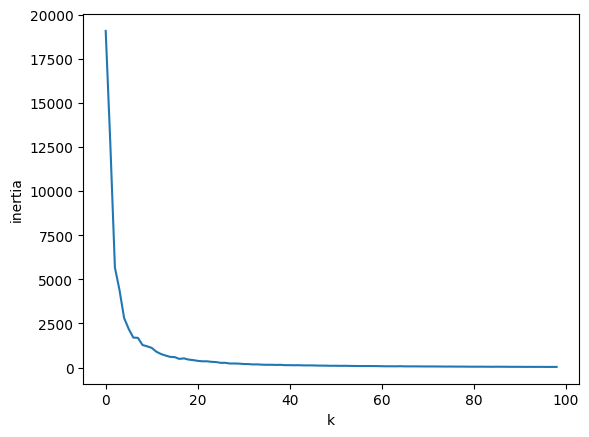

In [219]:
# ANSWER
values=[]
for k in range(1,100):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(scaled_data_df)
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    values.append(inertia)
plt.plot(values)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

A vue d'oeil, la valeur optimale de k est aux alentours de 25.

In [220]:
# number of clusters 
k = 25
# create a model
kmeans = KMeans(n_clusters=k, init='k-means++')
# fit scaled data
kmeans.fit(scaled_data_df)

labels = kmeans.labels_
print(f"k-means labels: {labels}")



k-means labels: [ 7  5 22 ...  3  3  3]


In [221]:
df_cleaned["KMeans"] = labels

df_cleaned

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,KMeans
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11,15,28,2,2010,23,20,28,2,2010,7
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51,17,28,2,2010,52,17,28,2,2010,5
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29,17,28,2,2010,33,17,28,2,2010,22
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15,20,28,1,2010,38,12,28,2,2010,8
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10,20,28,1,2010,38,12,28,2,2010,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18855,4752100875,40936370@N00,45.837545,4.826130,"portrait,streetart,france,art,argentina,argent...",Ernesto Guevara painted portrait P1040773,23,20,1,7,2010,6,20,1,7,2010,3
18856,4752100629,40936370@N00,45.837545,4.826130,"ernestoguevara,fidelcaastro,leche,cheguevara,b...",Ernesto Guevara painted portrait P1040772,23,20,1,7,2010,6,20,1,7,2010,3
18857,4752741796,40936370@N00,45.837545,4.826130,"portrait,streetart,france,art,argentina,argent...",Ernesto Guevara painted portrait P1040771,23,20,1,7,2010,6,20,1,7,2010,3
18858,4751822482,40936370@N00,45.837545,4.826130,"portrait,streetart,france,mystery,museum,archi...",Marée noire à la Demeure du Chaos P1040758,3,12,1,7,2010,59,12,1,7,2010,3


In [222]:
colors = [
    'red', 'blue', 'green', 'yellow', 'pink', 'orange', 'cyan', 'magenta', 'grey',
    'darkred', 'darkblue', 'darkgreen', 'darkyellow', 'darkpink', 'darkorange', 'darkcyan', 'darkmagenta', 'darkgrey',
    'lightred', 'lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightorange', 'lightcyan', 'lightmagenta',
    'purple', 'darkpurple', 'lightpurple', 'brown', 'darkbrown', 'lightbrown', 'beige', 'black', 'white', 
    'gold', 'silver', 'bronze', 'lime', 'teal', 'navy', 'maroon', 'olive', 'turquoise', 'indigo', 
    'violet', 'chocolate', 'coral', 'salmon', 'khaki', 'plum', 'orchid', 'tan', 'lavender', 'peach',
    'sienna', 'azure', 'amber', 'apricot', 'chartreuse', 'periwinkle', 'seagreen', 'forestgreen', 
    'skyblue', 'dodgerblue', 'midnightblue', 'steelblue', 'slateblue', 'powderblue', 'rosybrown', 
    'firebrick', 'goldenrod', 'crimson', 'tomato', 'hotpink', 'deepskyblue', 'royalblue', 
    'lawngreen', 'springgreen', 'mediumseagreen', 'darkslategrey', 'lightslategrey', 
    'mediumaquamarine', 'lightseagreen', 'darkkhaki', 'darkorchid', 'lightsalmon', 
    'darkgoldenrod', 'darkturquoise', 'darkviolet', 'mediumspringgreen', 'mediumslateblue',
    'palegoldenrod', 'paleturquoise', 'palevioletred', 'mediumvioletred', 'mediumblue'
]



In [224]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,
        color=colors[row['KMeans']],
        fill=True
    ).add_to(m)


m.save("map.html")

k means ne semble pas être une très bonne option. Il propose un clustering qui n'est pas réaliste. On se retrouve avec des points éloignés mis ensembles, et avec des zones proche qui sont séparés. Par exemple, Sathonay et Vaulx en velin sont dans le même cluster, mais l'Est et l'Ouest de la place Bellecour ne sont pas dans le même cluster.

## Hierarchical clustering

In [225]:
#from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

On prend le même nombre de clusters que kmeans pour pouvoir comparer les deux

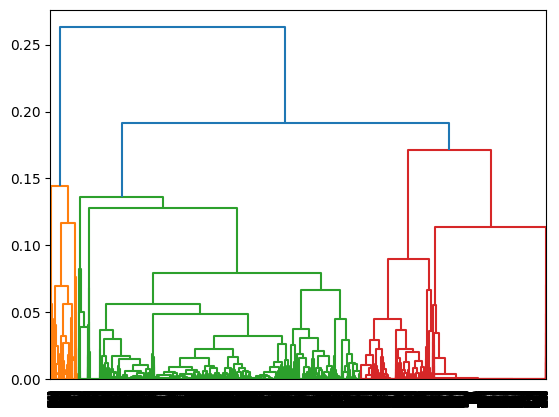

In [226]:
# Perform Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=25).fit(df_clustering)

# Get the cluster labels
labels = clustering.labels_

# If you're also using the linkage and dendrogram
Z = hierarchy.linkage(df_clustering, 'complete')
dn = hierarchy.dendrogram(Z)

# Now `labels` contains the cluster labels for each point in df_clustering



In [227]:
df_cleaned["Hierarchical"] = labels
df_cleaned


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,KMeans,Hierarchical
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11,15,28,2,2010,23,20,28,2,2010,7,6
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51,17,28,2,2010,52,17,28,2,2010,5,0
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29,17,28,2,2010,33,17,28,2,2010,22,0
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15,20,28,1,2010,38,12,28,2,2010,8,1
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10,20,28,1,2010,38,12,28,2,2010,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18855,4752100875,40936370@N00,45.837545,4.826130,"portrait,streetart,france,art,argentina,argent...",Ernesto Guevara painted portrait P1040773,23,20,1,7,2010,6,20,1,7,2010,3,8
18856,4752100629,40936370@N00,45.837545,4.826130,"ernestoguevara,fidelcaastro,leche,cheguevara,b...",Ernesto Guevara painted portrait P1040772,23,20,1,7,2010,6,20,1,7,2010,3,8
18857,4752741796,40936370@N00,45.837545,4.826130,"portrait,streetart,france,art,argentina,argent...",Ernesto Guevara painted portrait P1040771,23,20,1,7,2010,6,20,1,7,2010,3,8
18858,4751822482,40936370@N00,45.837545,4.826130,"portrait,streetart,france,mystery,museum,archi...",Marée noire à la Demeure du Chaos P1040758,3,12,1,7,2010,59,12,1,7,2010,3,8


In [229]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,
        color=colors[row['Hierarchical']],
        fill=True
    ).add_to(m)


m.save("map.html")

C'est un peu mieu, le clustering est plus pertinent, mais il y a toujours des endroits qui ne devraient pas être ensemble (comme croix rousse et tête d'or)

## DB Scan

In [230]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

In [255]:
X = StandardScaler().fit_transform(scaled_data_df)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.022, min_samples=30)  # Adjust eps and min_samples as needed
labels = dbscan.fit_predict(X)

# Add the cluster labels to the original DataFrame
df_cleaned["DBScan"] = labels

In [256]:
df_cleaned["DBSCAN"] = labels
df_cleaned

m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    if row['DBSCAN'] != -1:
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=colors[row['DBSCAN']],
            fill=True
        ).add_to(m)


m.save("map.html")

On constate que DBScan est bien plus convaincant car il permet d'éliminer de nombreux points qui n'apparaissent dans aucun cluster. C'est la méthode DBScan que nous utiliserons par la suite.

### Interprétation des résultats

Grâce à cette analyse, on peut déterminer efficacement les points d'intérêt de la métropole de Lyon.

Comme on pouvait s'y attendre, les sites touristiques notables tels que la Cathédrale de Fourvière ou encore le vieux Lyon sont beaucoup photographiés. La majorité des photos sont prises dans le vieux Lyon et sur la Presqu'Île (de Bellecour à Hôtel de Ville).
Les quais du Rhone et le pont Bonaparte possèdent également un grand intérêt, dù au cadre aquatique qu'ils proposent.

En dehors du Centre Ville, il y a beaucoup moins de centres d'intérêts. On peut néanmoins souligner la Cité Internationale, le Parc de la Tête d'Or ou encore l'INSA Lyon qui présente deux clusters distincts.

Afin d'améliorer l'expérience des touristes, il faut concentrer les efforts sur le maintien et l'amélioration des transports en commun à la Cathédrale de Fourvière, le Vieux Lyon et la Presqu'Île.

## Text-Pattern Mining

On utilise un nuage de mot pour voir les mots les plus fréquents, et pour pouvoir nettoyer si un mot reviens très souvent mais n'est pas pertinent

In [257]:
from wordcloud import WordCloud

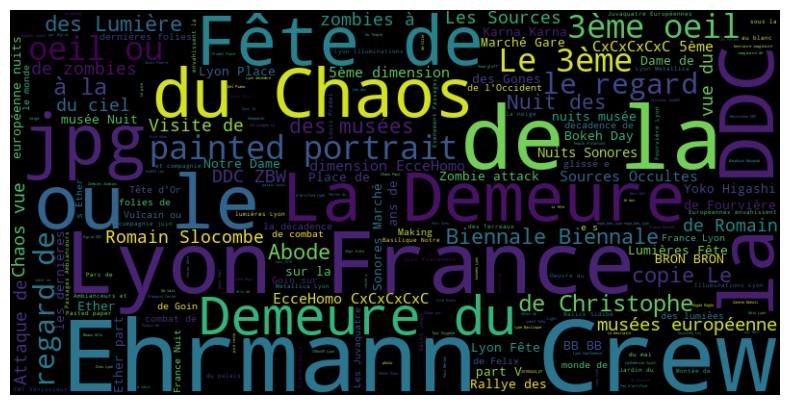

In [268]:

def show_word_cloud():
    # Combine all text in the column into one string
    text = " ".join(row for row in df_cleaned['title'] if isinstance(row, str))

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis labels
    plt.show()
show_word_cloud()

In [274]:

# Liste des mots vides (stopwords)
stopwords = {'ceci', 'est', 'une', 'à', 'de', 'le', 'la', 'les', 'un', 'et', 'en', 'ou', 'du'}

# Fonction pour supprimer les mots vides
def remove_stopwords(text):
    # Séparer les mots, filtrer les stopwords, puis reconstruire la phrase
    filtered_words = [word for word in str(text).split("") if word.lower() not in stopwords]
    return ' '.join(filtered_words)

# Appliquer la fonction à la colonne du DataFrame
df_cleaned['Cleaned_Text'] = df_cleaned['title'].apply(remove_stopwords)

# Afficher le résultat
df_cleaned

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,...,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,KMeans,Hierarchical,DBScan,DBSCAN,Cleaned_Text
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11,15,28,2,...,23,20,28,2,2010,7,6,-1,-1,Chaises avec vue
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51,17,28,2,...,52,17,28,2,2010,5,0,-1,-1,nan
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29,17,28,2,...,33,17,28,2,2010,22,0,0,0,59/365 - R46 V103 B163
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15,20,28,1,...,38,12,28,2,2010,8,1,-1,-1,2010-01-29 Toiou Avott Lyon
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10,20,28,1,...,38,12,28,2,2010,8,1,-1,-1,2010-01-28 Toiou Avott Lyon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18855,4752100875,40936370@N00,45.837545,4.826130,"portrait,streetart,france,art,argentina,argent...",Ernesto Guevara painted portrait P1040773,23,20,1,7,...,6,20,1,7,2010,3,8,4,4,Ernesto Guevara painted portrait P1040773
18856,4752100629,40936370@N00,45.837545,4.826130,"ernestoguevara,fidelcaastro,leche,cheguevara,b...",Ernesto Guevara painted portrait P1040772,23,20,1,7,...,6,20,1,7,2010,3,8,4,4,Ernesto Guevara painted portrait P1040772
18857,4752741796,40936370@N00,45.837545,4.826130,"portrait,streetart,france,art,argentina,argent...",Ernesto Guevara painted portrait P1040771,23,20,1,7,...,6,20,1,7,2010,3,8,4,4,Ernesto Guevara painted portrait P1040771
18858,4751822482,40936370@N00,45.837545,4.826130,"portrait,streetart,france,mystery,museum,archi...",Marée noire à la Demeure du Chaos P1040758,3,12,1,7,...,59,12,1,7,2010,3,8,4,4,Marée noire Demeure Chaos P1040758


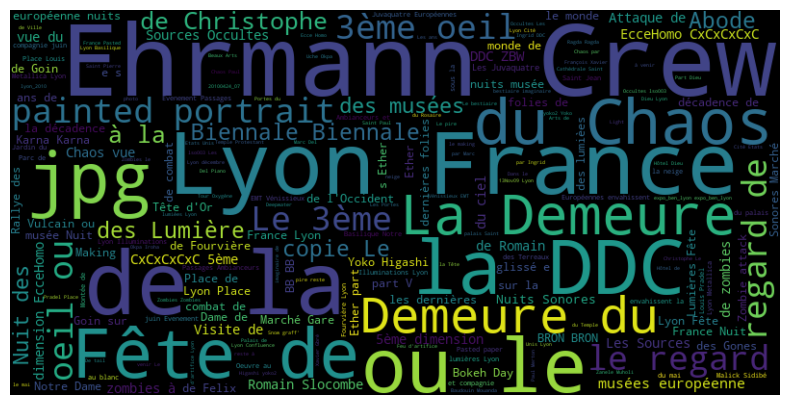

In [276]:
show_word_cloud()